# Introduction to Time Series Analysis

## 📌 What is a Time Series?

A **time series** is a sequence of observations recorded **at regular time intervals**. Examples:

- Daily stock prices
- Monthly rainfall
- Yearly population

Key characteristics:
- **Trend**: long-term increase or decrease
- **Seasonality**: repeating patterns at fixed intervals
- **Noise**: random fluctuations


## 📌 Components of a Time Series

A time series can be expressed as:

$$
y_t = T_t + S_t + R_t
$$

Where:  
- $y_t$ = observed value at time $t$  
- $T_t$ = trend component  
- $S_t$ = seasonal component  
- $R_t$ = residual / random noise

Alternatively, for multiplicative seasonality:

$$
y_t = T_t \times S_t \times R_t
$$


## 📌 Stationarity

A time series is **stationary** if its **mean, variance, and autocorrelation structure** do not change over time.  

- Many time series models require stationarity.  
- Non-stationary series can be transformed using **differencing**, **log transform**, or **de-trending**.

**Autocorrelation** measures correlation of a series with its past values:

$$
\rho_k = \frac{\text{Cov}(y_t, y_{t-k})}{\text{Var}(y_t)}
$$


In [1]:
# Simulate a monthly time series with trend + seasonality + noise
set.seed(123)
time_points <- 1:48  # 4 years of monthly data
trend <- 0.5 * time_points
season <- 10 * sin(2 * pi * time_points / 12)
noise <- rnorm(48, mean = 0, sd = 3)
ts_data <- trend + season + noise

# Convert to time series object
ts_series <- ts(ts_data, frequency = 12, start = c(2020, 1))

# Print first few observations
print("First 12 observations:")
print(head(ts_series, 12))

[1] "First 12 observations:"
            Jan        Feb        Mar        Apr        May        Jun
2020  3.8185731  8.9697216 16.1761249 10.8717792  7.8878632  8.1451950
            Jul        Aug        Sep        Oct        Nov        Dec
2020 -0.1172514 -8.4554377 -7.5605586 -4.9972399  4.1722454  7.0794415


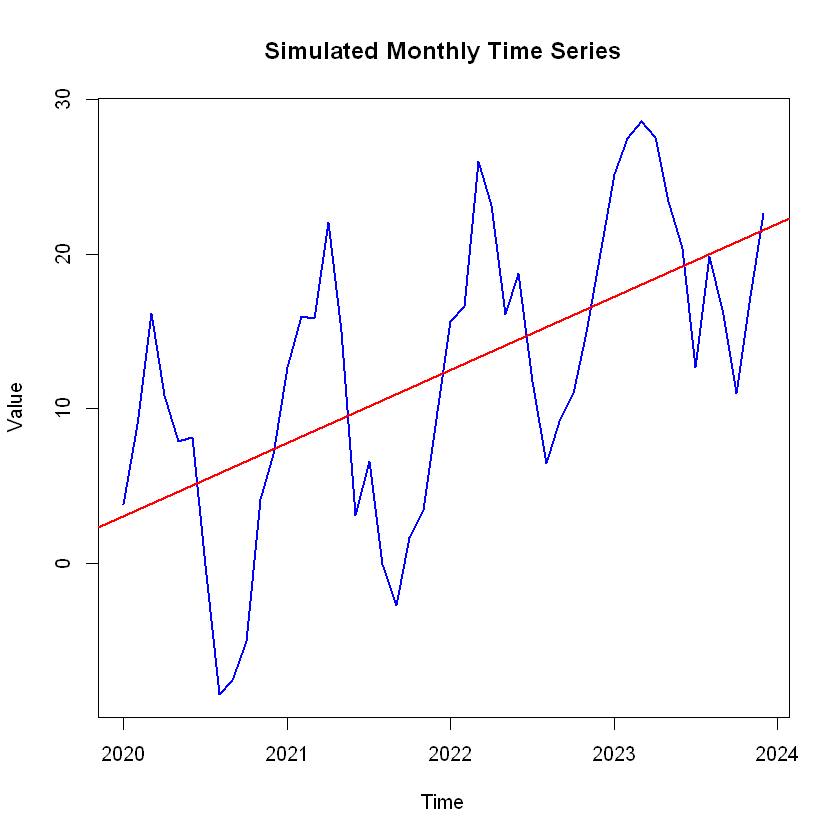

In [2]:
# Plot the time series
par(bg = "white", col.axis = "black", col.lab = "black", col.main = "black", pch = 19)
plot(ts_series, main = "Simulated Monthly Time Series", 
     xlab = "Time", ylab = "Value", col = "blue", lwd = 2)

# Add a trend line (simple linear fit)
abline(lm(ts_series ~ time(ts_series)), col = "red", lwd = 2)

## 📌 Decomposition of Time Series

We can separate a time series into **trend, seasonal, and residual** components using `decompose()`:

$$
y_t = T_t + S_t + R_t
$$

- Trend: long-term movement
- Seasonal: repeating patterns
- Residual: random noise


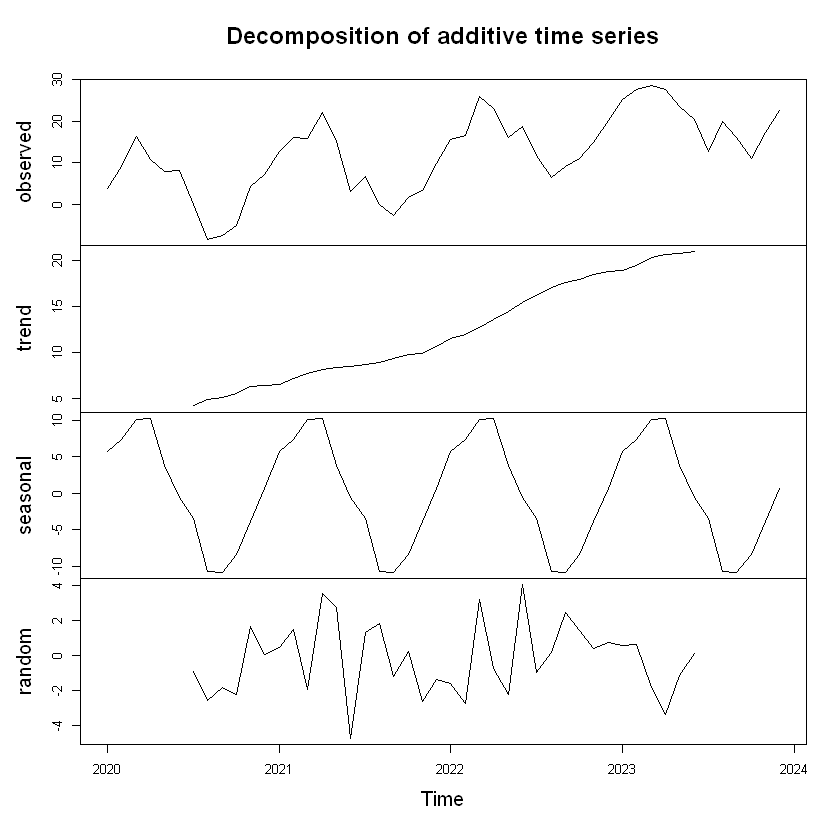

In [4]:
# Decompose the time series
ts_decomp <- decompose(ts_series)

# Plot components
par(bg = "white", col.axis = "black", col.lab = "black", col.main = "black", pch = 19)
plot(ts_decomp)


# Real-World Analogy

Imagine tracking monthly electricity consumption:

- **Trend**: gradual increase in consumption due to population growth  
- **Seasonality**: higher usage in winter and summer (heating/cooling)  
- **Noise**: daily fluctuations or random events

Decomposition helps **understand patterns and forecast future consumption**.
